In [1]:
import galarp as grp
from galarp import InterpolatedWind, InterpolatedDensity

grp.pyplot_style()
cmap = grp.lavender_cmap(step_1=50)

import numpy as np

from astropy import units as u
from astropy.table import Table

from gala.units import galactic
from scipy.interpolate import interp1d

from matplotlib import pyplot as plt

from scipy import stats

In [2]:
orbits = grp.OrbitContainer.load("temp/orbits_JZ_dup.grp")

print(orbits)

(0.0, 6.0)

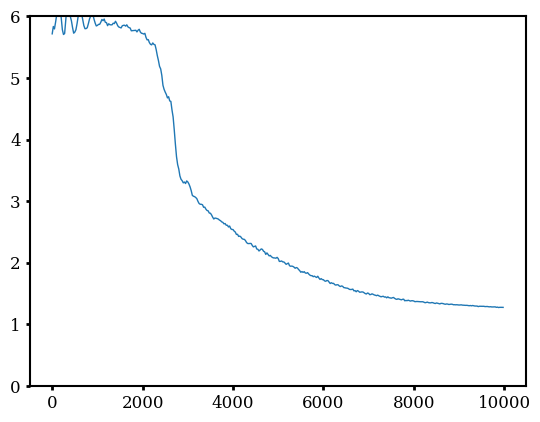

In [3]:

def rstrip(orbits, zmax=2 * u.kpc, r_strip_frac=0.8, rmax=20 * u.kpc):
    if type(orbits) == str:
        orbits = grp.OrbitContainer.load(orbits)

    x,y,z, *_ = grp.get_orbit_data(orbits.data)
    
    x,y,z = x.T, y.T, z.T
    
    r = np.sqrt(x**2 + y**2 + z**2)
    
    times = orbits.data.t
    
    strip_times, rstrips = [], []
    for i in range(0, len(r), 5):
        this_r, this_z = r[i], z[i]
        this_r_cut = this_r[np.abs(this_z) < zmax.value]
        this_r_cut = this_r_cut[this_r_cut < rmax.value]
        
        cdf = stats.ecdf(this_r_cut)
        cdf_xs, cdf_vals = cdf.cdf.quantiles, cdf.cdf.probabilities
        
        closest = np.argmin(np.abs(cdf_vals - r_strip_frac)) 
        strip_times.append(times[i].value)
        rstrips.append(cdf_xs[closest])
        
    return strip_times, rstrips


strip_xs, strip_ys = rstrip(orbits)

plt.plot(strip_xs, strip_ys)
plt.ylim(0, 6)

In [4]:
grp.rstrip_plot(orbits, title="Stripping Radius", rstrip_frac=0.8, zmax=2 * u.kpc, rmax=20 * u.kpc, 
            outname="figures/stripping_radius_JZ.pdf", close_plot=True)